In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

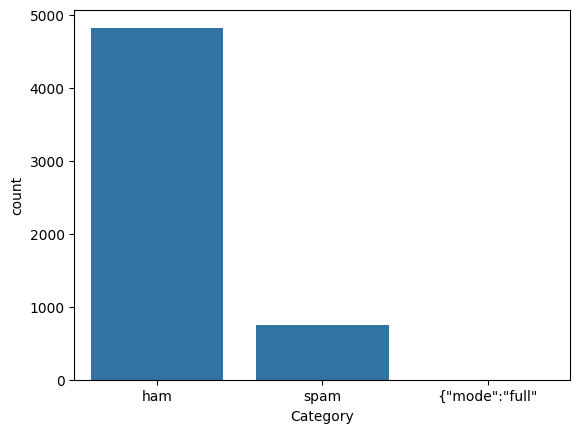

In [6]:
#Class imbalance problem
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x='Category',data=df)
plt.show()

In [7]:
#preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text: remove stopwords, punctuation, and lemmatize
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lowercasing
    words = [word.lower() for word in words]
    
    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Return the cleaned text
    return ' '.join(words)

# Apply the preprocessing to the 'text' column
df['Message'] = df['Message'].apply(preprocess_text)

# Display the first few rows of the cleaned dataset
df['Message'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    go jurong point crazy .. available bugis n gre...
1                      ok lar ... joking wif u oni ...
2    free entry 2 wkly comp win fa cup final tkts 2...
3          u dun say early hor ... u c already say ...
4              nah n't think go usf life around though
Name: Message, dtype: object

In [8]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,go jurong point crazy .. available bugis n gre...
1,0,ok lar ... joking wif u oni ...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor ... u c already say ...
4,0,nah n't think go usf life around though


In [9]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Message'])
y = df['Category']
print(X)

  (0, 7789)	0.19565723942060445
  (0, 1061)	0.35017086476246306
  (0, 3422)	0.16233379558046795
  (0, 1977)	0.29582685314996565
  (0, 1701)	0.33427626029643
  (0, 4251)	0.29582685314996565
  (0, 7991)	0.23474615370265042
  (0, 3459)	0.1934377267981118
  (0, 1703)	0.29582685314996565
  (0, 1283)	0.26191815950889913
  (0, 2233)	0.2711848166204587
  (0, 5590)	0.23910630070718308
  (0, 4132)	0.35017086476246306
  (0, 3383)	0.15494339022778617
  (1, 5233)	0.5466219551250759
  (1, 7902)	0.4316302868726235
  (1, 4102)	0.5236786867319152
  (1, 4284)	0.4083271880857088
  (1, 5206)	0.2718993824234455
  (2, 77)	0.2357357342281899
  (2, 1144)	0.16944599130501267
  (2, 5895)	0.16212857357937716
  (2, 7467)	0.12478608886772091
  (2, 6819)	0.1974116681786986
  (2, 5844)	0.16781934744602567
  :	:
  (5567, 5895)	0.22351260875402404
  (5568, 2848)	0.6485954455351258
  (5568, 3187)	0.5597086342533678
  (5568, 3394)	0.3642412484432335
  (5568, 3705)	0.36521022125049585
  (5569, 5524)	0.6198313330228256
  

In [10]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#model training
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
#model evaluation
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.968609865470852


In [12]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9775784753363229


In [13]:
#using XGBoost
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


In [14]:
#evaluation on unseen data
text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
text = preprocess_text(text)
text = tfidf.transform([text])
prediction = model.predict(text)
if prediction[0] == 0:
    print("Ham")
else:
    print("Spam")

Spam
